In [6]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("heart_disease.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
from sklearn.preprocessing import LabelEncoder

df['sex'] = df['sex'].astype(str).str.strip()
df['sex'] = df['sex'].str.lower().map({'male': 1, 'female': 0})


# Fill NaN values with 0 (assuming a default of no fasting blood sugar issues)
df['fbs'] = df['fbs'].fillna(0).astype(int)

df['exang'] = df['exang'].fillna(0).astype(int)

df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

categorical_cols = ['cp', 'restecg', 'slope', 'thal']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check the processed data
print(df.head())

   id  age  sex    dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   1   63    1  Cleveland   3     145.0  233.0    1        0   150.0      0   
1   2   67    1  Cleveland   0     160.0  286.0    0        0   108.0      1   
2   3   67    1  Cleveland   0     120.0  229.0    0        0   129.0      1   
3   4   37    1  Cleveland   2     130.0  250.0    0        1   187.0      0   
4   5   41    0  Cleveland   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope   ca  thal  num  
0      2.3      0  0.0     0    0  
1      1.5      1  3.0     1    1  
2      2.6      1  2.0     2    1  
3      3.5      0  0.0     1    0  
4      1.4      2  0.0     1    0  


In [22]:
from sklearn.model_selection import train_test_split

# Drop rows with missing values from the entire DataFrame
df_cleaned = df.dropna()

# Prepare the data
X = df_cleaned.drop(['id', 'dataset', 'num', 'sex'], axis=1)

y = df_cleaned['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train, X_test, y_train, y_test for model training and evaluation

In [23]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(class_weight='balanced', max_iter=1000)  # Adjust max_iter if necessary

# Train the model
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [24]:
yhat = model.predict(X_test)
yhat


array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [25]:
print(y_test[:5])
print(yhat[:5])

291    0
9      1
57     1
60     1
25     0
Name: num, dtype: int64
[0 1 0 1 0]


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(yhat, y_test)
print(f"Accuracy: {int(accuracy*100)}%")

# Precision
precision = precision_score(yhat, y_test)
print("Precision:", precision)

# Recall
recall = recall_score(yhat, y_test)
print("Recall:", recall)

# F1 Score
f1 = f1_score(yhat, y_test)
print("F1 Score:", f1)


Accuracy: 82%
Precision: 0.8214285714285714
Recall: 0.7931034482758621
F1 Score: 0.8070175438596491


[[28  5]
 [ 6 23]]


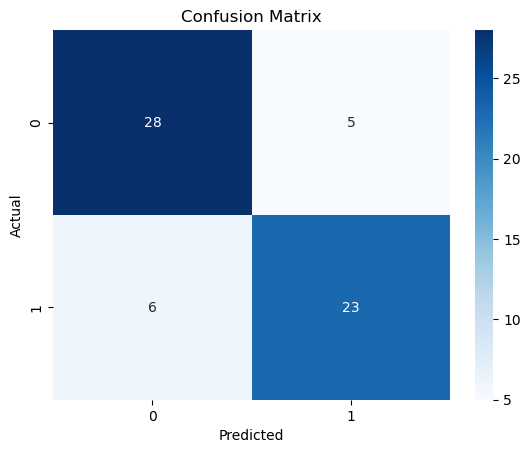

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(yhat, y_test)

print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [28]:
import pickle

# Assuming 'model' is your trained Logistic Regression model
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)